In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# **Step 1: Load the Data**

In [ ]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


# **Step 2 - Data Cleaning**

In [ ]:
label_encoders = {}
categorical_columns = train_df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    train_df[column] = label_encoders[column].fit_transform(train_df[column])

column_of_interest = 'NObeyesdad'

for encoded_value in train_df[column_of_interest].unique():
    category_name = label_encoders[column_of_interest].inverse_transform([encoded_value])[0]
    print(f"[{encoded_value}] {category_name}")

train_df.head()

[6] Overweight_Level_II
[1] Normal_Weight
[0] Insufficient_Weight
[4] Obesity_Type_III
[3] Obesity_Type_II
[5] Overweight_Level_I
[2] Obesity_Type_I


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6


In [ ]:
features = ['id','Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS']

# **Step 3 - Data Splitting**

In [ ]:
X = train_df.drop(columns=['id', 'NObeyesdad','Height','Weight'])
y = train_df['NObeyesdad']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape

((16606, 14), (4152, 14))

# **Step 4 - Model Training**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

In [ ]:
print('Accuracy:', f'{accuracy:0.2f}')

Accuracy: 0.71


In [ ]:
print('conf_matrix:')
conf_matrix

conf_matrix:


array([[378,  93,  19,   1,   4,  17,  12],
       [ 65, 403,  38,   4,   0,  66,  50],
       [ 11,  42, 346,  23,   2,  54,  65],
       [  1,   6,  17, 602,   0,   5,  26],
       [  1,   2,   0,   1, 799,   1,   0],
       [ 35, 122,  67,   6,   3, 196,  55],
       [ 20,  69,  83,  48,   0,  66, 228]])

In [ ]:
print('class_report:')
print(class_report)

class_report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       524
           1       0.55      0.64      0.59       626
           2       0.61      0.64      0.62       543
           3       0.88      0.92      0.90       657
           4       0.99      0.99      0.99       804
           5       0.48      0.40      0.44       484
           6       0.52      0.44      0.48       514

    accuracy                           0.71      4152
   macro avg       0.68      0.68      0.68      4152
weighted avg       0.71      0.71      0.71      4152



In [ ]:
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
features_df['Importance'] = features_df['Importance'].round(3)
print(features_df)

                           Feature  Importance
1                              Age       0.205
4                             FCVC       0.136
11                             TUE       0.103
8                             CH2O       0.103
10                             FAF       0.100
0                           Gender       0.080
5                              NCP       0.068
6                             CAEC       0.048
2   family_history_with_overweight       0.046
12                            CALC       0.045
13                          MTRANS       0.031
3                             FAVC       0.022
9                              SCC       0.011
7                            SMOKE       0.003


# **Step 5 - Prediction**

In [ ]:
# Function to handle unseen categories
def handle_unseen_labels(column, encoder):
    unique_labels = encoder.classes_
    mapping = {label: idx for idx, label in enumerate(unique_labels)}
    return column.apply(lambda x: mapping.get(x, -1))

# Apply the function to preprocess the test set
for column in categorical_columns:
    if column in test_df.columns:
        test_df[column] = handle_unseen_labels(test_df[column], label_encoders[column])

# Drop the 'id' column from the test set
X_test = test_df.drop(columns=['id','Height','Weight'])

# Make predictions
test_predictions = rf_model.predict(X_test)

print(test_predictions)

[3 5 4 ... 0 0 3]


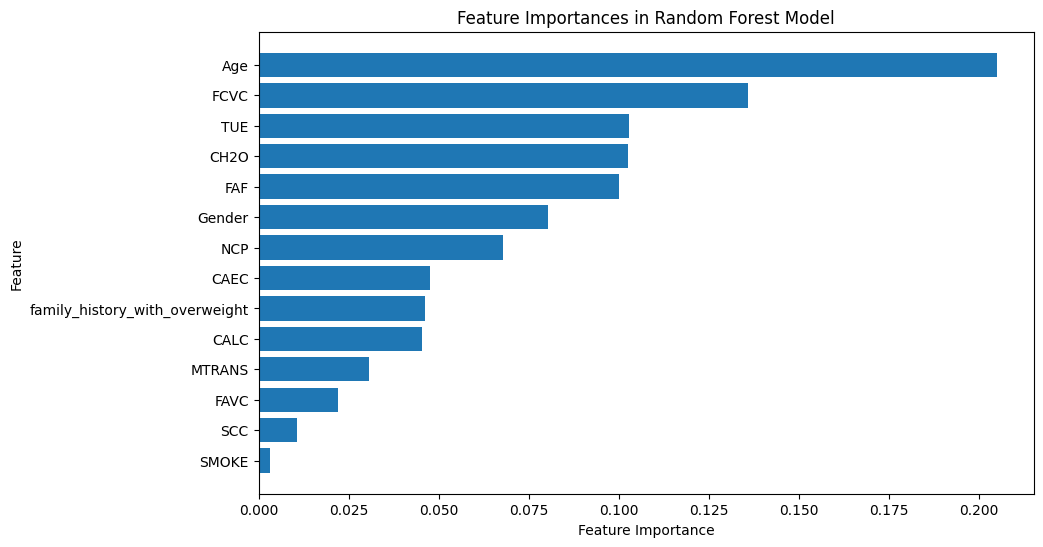

In [ ]:
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Filtering
# X = train_df.drop(columns=['id', 'NObeyesdad','Height','Weight','SCC','SMOKE'])
X = train_df.drop(columns=['id', 'NObeyesdad','Height','Weight'])

y = train_df['NObeyesdad']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape

# Training

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

# Evaluting
print('Accuracy:', f'{accuracy:0.2f}')



Accuracy: 0.71


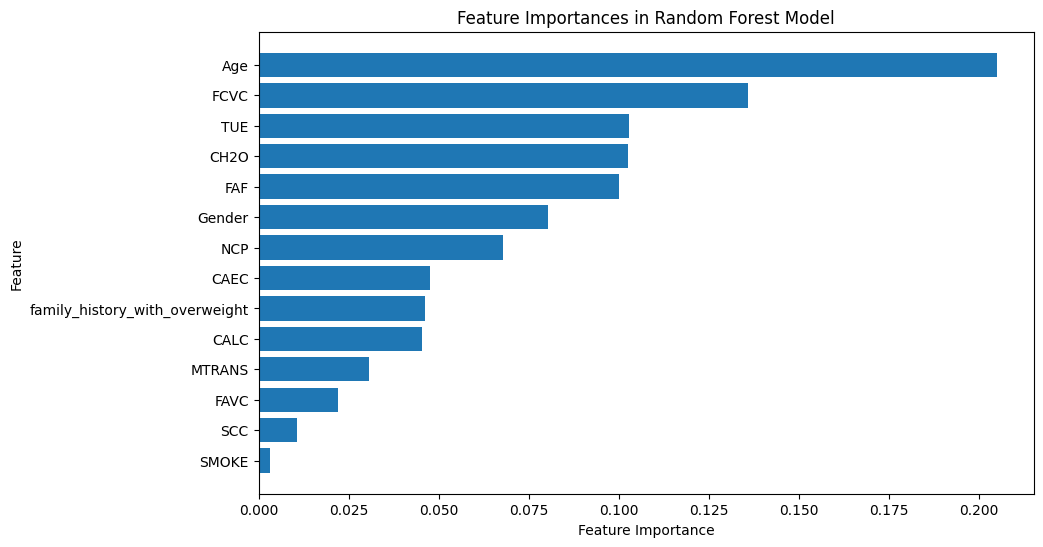

In [ ]:
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

# **Manual Simulation**

**Scenario 1 (21 years old)**


In [ ]:
data = {
    'id': [999999],
    # Gender of the individual.                     [ Male | Female ]
    'Gender': ['Male'],
    # Age of the individual.                        [ Int ]
    'Age': [21],
    # Height of the individual in meters.           [ float ]
    'Height': ['NA'],
    # Weight of the individual in kilograms.        [ float ]
    'Weight': ['NA'],
    # Family history of overweight.                 [ yes | no ]
    'family_history_with_overweight': ['no'],
    # Frequent consumption of high caloric food.    [ yes | no ]
    'FAVC': ['yes'],
    # Frequency of consumption of vegetables.       [ float ]
    'FCVC': [2.0],
    # Number of main meals.                         [ float ]
    'NCP': [3.0],
    # Consumption of food between meals.            [ no | Sometimes | Frequently | Always ]
    'CAEC': ['yes'],
    # Smoking status.                               [ yes | no ]
    'SMOKE': ['no'],
    # Daily water consumption.                      [ float ]
    'CH2O': [1],
    # Monitoring of calorie consumption.            [ yes | no ]
    'SCC': ['NA'],
    # Frequency of physical activity.               [ float ]
    'FAF': [2.0],
    # Time using technology devices.                [ float ]
    'TUE': [1.0],
    # Consumption of alcohol.                       [ no | Sometimes | Frequently | Always ]
    'CALC': ['Frequently'],
    # Mode of transportation used.                  [ Public_Transportation | Automobile | Walking | Bike | Motorbike ]
    'MTRANS': ['Automobile']
}

# Create the DataFrame
new_df = pd.DataFrame(data)

# Function to handle unseen categories
def handle_unseen_labels(column, encoder):
    unique_labels = encoder.classes_
    mapping = {label: idx for idx, label in enumerate(unique_labels)}
    return column.apply(lambda x: mapping.get(x, -1))

# Apply the function to preprocess the new data point
for column in categorical_columns:
    if column in new_df.columns:
        new_df[column] = handle_unseen_labels(new_df[column], label_encoders[column])

# Drop the 'id' column from the new data point
# X_new = new_df.drop(columns=['id', 'Height', 'Weight', 'SCC', 'SMOKE'])
X_new = new_df.drop(columns=['id', 'Height', 'Weight'])


# Make prediction
new_prediction = rf_model.predict(X_new)

# Assuming `target_label_encoder` is the LabelEncoder for the target variable
target_label_encoder = label_encoders['NObeyesdad']

# Get the category name for the predicted target
predicted_category_name = target_label_encoder.inverse_transform([new_prediction[0]])

# Print the predicted target variable number and name
print("Prediction to Manual Simulation: (With 21 years old)")
print("- " * 20)
print(f"     [{new_prediction[0]}] {predicted_category_name[0]}")
print("- " * 20)
print("[ Insufficient_Weight | Normal_Weight | Overweight_Level_I | Overweight_Level_II | Obesity_Type_I | Obesity_Type_II | Obesity_Type_III ]")


Prediction to Manual Simulation: (With 21 years old)
- - - - - - - - - - - - - - - - - - - - 
     [1] Normal_Weight
- - - - - - - - - - - - - - - - - - - - 
[ Insufficient_Weight | Normal_Weight | Overweight_Level_I | Overweight_Level_II | Obesity_Type_I | Obesity_Type_II | Obesity_Type_III ]


**Scenario 2 - 60 years old and the same life style**

In [ ]:
data = {
    'id': [999999],
    # Gender of the individual.                     [ Male | Female ]
    'Gender': ['Male'],
    # Age of the individual.                        [ Int ]
    'Age': [60],                                                         # <---- Unique change
    # Height of the individual in meters.           [ float ]
    'Height': ['NA'],
    # Weight of the individual in kilograms.        [ float ]
    'Weight': ['NA'],
    # Family history of overweight.                 [ yes | no ]
    'family_history_with_overweight': ['no'],
    # Frequent consumption of high caloric food.    [ yes | no ]
    'FAVC': ['yes'],
    # Frequency of consumption of vegetables.       [ float ]
    'FCVC': [2.0],
    # Number of main meals.                         [ float ]
    'NCP': [3.0],
    # Consumption of food between meals.            [ no | Sometimes | Frequently | Always ]
    'CAEC': ['yes'],
    # Smoking status.                               [ yes | no ]
    'SMOKE': ['no'],
    # Daily water consumption.                      [ float ]
    'CH2O': [1],
    # Monitoring of calorie consumption.            [ yes | no ]
    'SCC': ['NA'],
    # Frequency of physical activity.               [ float ]
    'FAF': [2.0],
    # Time using technology devices.                [ float ]
    'TUE': [1.0],
    # Consumption of alcohol.                       [ no | Sometimes | Frequently | Always ]
    'CALC': ['no'],
    # Mode of transportation used.                  [ Public_Transportation | Automobile | Walking | Bike | Motorbike ]
    'MTRANS': ['Automobile']
}

# Create the DataFrame
new_df = pd.DataFrame(data)

# Function to handle unseen categories
def handle_unseen_labels(column, encoder):
    unique_labels = encoder.classes_
    mapping = {label: idx for idx, label in enumerate(unique_labels)}
    return column.apply(lambda x: mapping.get(x, -1))

# Apply the function to preprocess the new data point
for column in categorical_columns:
    if column in new_df.columns:
        new_df[column] = handle_unseen_labels(new_df[column], label_encoders[column])

# Drop the 'id' column from the new data point
# X_new = new_df.drop(columns=['id', 'Height', 'Weight', 'SCC', 'SMOKE'])
X_new = new_df.drop(columns=['id', 'Height', 'Weight'])


# Make prediction
new_prediction = rf_model.predict(X_new)

# Assuming `target_label_encoder` is the LabelEncoder for the target variable
target_label_encoder = label_encoders['NObeyesdad']

# Get the category name for the predicted target
predicted_category_name = target_label_encoder.inverse_transform([new_prediction[0]])

# Print the predicted target variable number and name
print("Prediction to Manual Simulation: (With 21 years old)")
print("- " * 20)
print(f"     [{new_prediction[0]}] {predicted_category_name[0]}")
print("- " * 20)
print("[ Insufficient_Weight | Normal_Weight | Overweight_Level_I | Overweight_Level_II | Obesity_Type_I | Obesity_Type_II | Obesity_Type_III ]")


Prediction to Manual Simulation: (With 21 years old)
- - - - - - - - - - - - - - - - - - - - 
     [6] Overweight_Level_II
- - - - - - - - - - - - - - - - - - - - 
[ Insufficient_Weight | Normal_Weight | Overweight_Level_I | Overweight_Level_II | Obesity_Type_I | Obesity_Type_II | Obesity_Type_III ]


**Scenario 3 - (60 years old with new habbits)**

In [ ]:
data = {
    'id': [999999],
    # Gender of the individual.                     [ Male | Female ]
    'Gender': ['Male'],
    # Age of the individual.                        [ Int ]
    'Age': [60],                                                             # <---- change
    # Height of the individual in meters.           [ float ]
    'Height': ['NA'],
    # Weight of the individual in kilograms.        [ float ]
    'Weight': ['NA'],
    # Family history of overweight.                 [ yes | no ]
    'family_history_with_overweight': ['no'],
    # Frequent consumption of high caloric food.    [ yes | no ]
    'FAVC': ['no'],                                                          # <---- change
    # Frequency of consumption of vegetables.       [ float ]
    'FCVC': [8.0],                                                           # <---- change
    # Number of main meals.                         [ float ]
    'NCP': [3.0],
    # Consumption of food between meals.            [ no | Sometimes | Frequently | Always ]
    'CAEC': ['yes'],
    # Smoking status.                               [ yes | no ]
    'SMOKE': ['no'],
    # Daily water consumption.                      [ float ]
    'CH2O': [1],
    # Monitoring of calorie consumption.            [ yes | no ]
    'SCC': ['NA'],
    # Frequency of physical activity.               [ float ]
    'FAF': [5.0],                                                            # <---- change
    # Time using technology devices.                [ float ]
    'TUE': [1.0],
    # Consumption of alcohol.                       [ no | Sometimes | Frequently | Always ]
    'CALC': ['no'],
    # Mode of transportation used.                  [ Public_Transportation | Automobile | Walking | Bike | Motorbike ]
    'MTRANS': ['Public_Transportation']                                      # <---- change
}

# Create the DataFrame
new_df = pd.DataFrame(data)

# Function to handle unseen categories
def handle_unseen_labels(column, encoder):
    unique_labels = encoder.classes_
    mapping = {label: idx for idx, label in enumerate(unique_labels)}
    return column.apply(lambda x: mapping.get(x, -1))

# Apply the function to preprocess the new data point
for column in categorical_columns:
    if column in new_df.columns:
        new_df[column] = handle_unseen_labels(new_df[column], label_encoders[column])

# Drop the 'id' column from the new data point
# X_new = new_df.drop(columns=['id', 'Height', 'Weight', 'SCC', 'SMOKE'])
X_new = new_df.drop(columns=['id', 'Height', 'Weight'])


# Make prediction
new_prediction = rf_model.predict(X_new)

# Assuming `target_label_encoder` is the LabelEncoder for the target variable
target_label_encoder = label_encoders['NObeyesdad']

# Get the category name for the predicted target
predicted_category_name = target_label_encoder.inverse_transform([new_prediction[0]])

# Print the predicted target variable number and name
print("Prediction to Manual Simulation: (With 21 years old)")
print("- " * 20)
print(f"     [{new_prediction[0]}] {predicted_category_name[0]}")
print("- " * 20)
print("[ Insufficient_Weight | Normal_Weight | Overweight_Level_I | Overweight_Level_II | Obesity_Type_I | Obesity_Type_II | Obesity_Type_III ]")


Prediction to Manual Simulation: (With 21 years old)
- - - - - - - - - - - - - - - - - - - - 
     [1] Normal_Weight
- - - - - - - - - - - - - - - - - - - - 
[ Insufficient_Weight | Normal_Weight | Overweight_Level_I | Overweight_Level_II | Obesity_Type_I | Obesity_Type_II | Obesity_Type_III ]
